# Bike Sharing Assignment

***This assignment is a programming assignment wherein we will build a multiple linear regression model for the prediction of demand for shared bikes.***

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

We will understand the factors on which the demand for shared bikes depends. Specifically, they we will inspect the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

In [96]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [97]:
# importing Data Vizualization Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Importing Scikit-learn library

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [99]:
# Importing Statsmodels library

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
#Display all the columns

pd.pandas.set_option('display.max_columns',None)

### Data understanding

In [101]:
# Read the csv file

Day = pd.read_csv("Day (1).csv")

In [102]:
# Inspecting first 5 rows

Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
# Inspecting last 5 rows

Day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


**Here we can see that column `instant` just gives us the indexing so we will drop this column before proceeding with the analysis.**

In [104]:
# Drop column instant

Day.drop(columns="instant", inplace= True)

In [105]:
Day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Understanding the metadata**

In [106]:
# Inspecting the number of rows and columns

Day.shape

(730, 15)

In [107]:
# Display the colimn names

Day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

As per the data dictionary below is the column understanding for categorical variables having numeric data

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : (1: holiday, 0: not a holiday)
- weekday : day of the week (0 to 6)
- workingday : (1: working day, 0:not a working day)
- weathersit : (1: (Clear or Partly cloudy), 2: (Mist + Cloudy, Mist + Broken clouds), 3: (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), 4: (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog))


In [108]:
# Inspecting the data types of all the columns

Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [109]:
# Describing the columns

Day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [110]:
# Checking null value counts of all the columns

Day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**We can see that there are no null values present in dataset so there is no need to perform Null value handling here.**

### Data Cleaning

In [111]:
Day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**By looking at the column we can see that column season, yr, mnth, weekday already specify the date so keeping the `dteday` column is unnecessary. Hence we will be dropping column `dteday`.**

In [112]:
# Drop column dteday

Day.drop(columns="dteday", inplace= True)

**As per the data dictionary column `cnt` gives count of total rental bikes including both casual and registered. Also our goal is to predict the demand of shared bikes which is specified by the cnt column. So our Target variable will be column `cnt`.**

**We have the data for casual and registered users together in our Target variable `cnt` itself. So we will be dropping the columns `casual` and `registered`.**

In [113]:
# Drop the column casual and registered

Day.drop(columns=["casual","registered"], inplace= True)

**As the categorical columns `season`,`mnth`,`weekday` and `weathersit` have values as 1, 2, 3, 4 etc which have specific labels associated with them (as can be seen in the data dictionary). We will convert such feature values into categorical string values before proceeding with model building.**

*Note : Categorical columns with binary values are not considered in this case*

In [114]:
# Convert the numeric values of feature season into appropraite string labels

def season_func(x):
    season_dict = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
    return season_dict[x]

Day.season = Day.season.apply(season_func)

In [115]:
# Convert the numeric values of feature mnth into appropraite string labels

def mnth_func(x):
    mnth_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
    return mnth_dict[x]

Day.mnth = Day.mnth.apply(mnth_func)

In [116]:
# Convert the numeric values of feature weekday into appropraite string labels

def weekday_func(x):
    weekday_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
    return weekday_dict[x]

Day.weekday = Day.weekday.apply(weekday_func)

In [117]:
# Convert the numeric values of feature weathersit into appropraite string labels

def weathersit_func(x):
    weathersit_dict = {1:"weathersit_1", 2:"weathersit_2", 3:"weathersit_3", 4:"weathersit_4"}
    return weathersit_dict[x]

Day.weathersit = Day.weathersit.apply(weathersit_func)

*Now we have dataset with all the valid columns let's go ahead and do some Data analysis*

### Data Visualization

**Univariate Analysis**

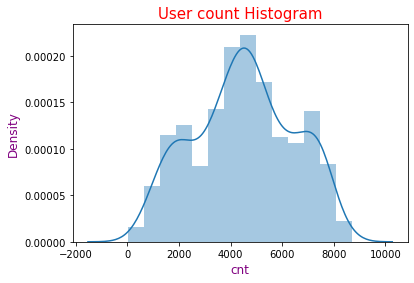

In [118]:
# plot a histogram of column cnt

sns.distplot(Day.cnt)
plt.title("User count Histogram", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.xlabel("cnt", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.ylabel("Density", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})

plt.show()

Inference :

*We can see that user count density is maximum in range of 2000 to 8000.*

*Now we will first separate the categorical and numerical columns*

In [119]:
Day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [120]:
# Create two lists to separate the categorical and numerical columns

categorical_cols =["season","yr","mnth","holiday","weekday","workingday","weathersit"]

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

**Bi-variate Analysis**

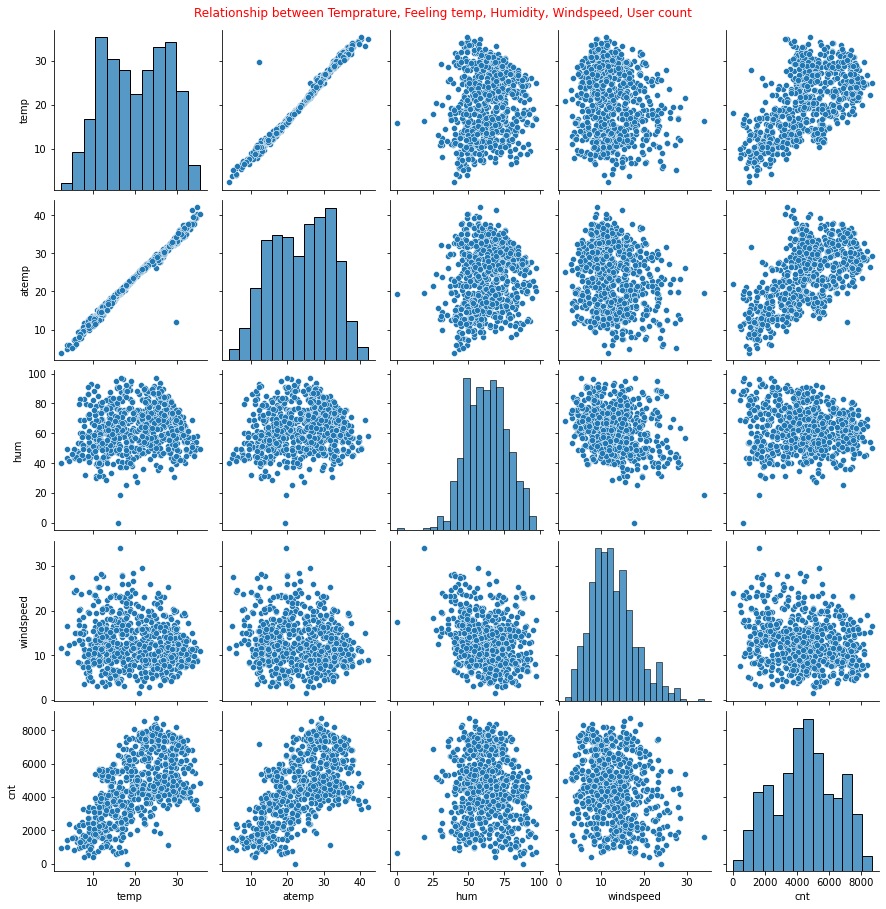

In [121]:
# Plotting a pairplot of numerical cols

pp = sns.pairplot(Day[numerical_cols])
pp.fig.suptitle("Relationship between Temprature, Feeling temp, Humidity, Windspeed, User count", y=1.01, fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

Inference :

*There is some correlation between `temp`, `cnt` pair and `atemp`, `cnt` pair. We can also see `temp` and `atemp` are highly correlated*

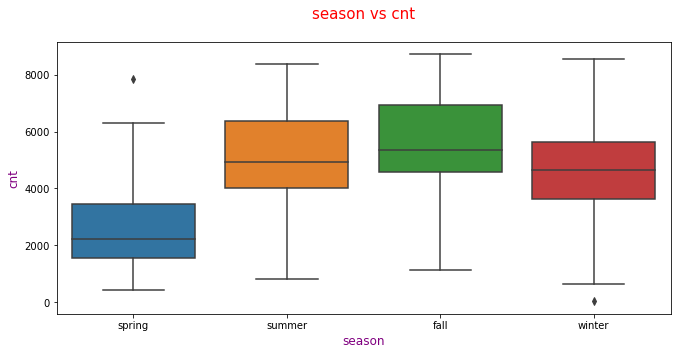

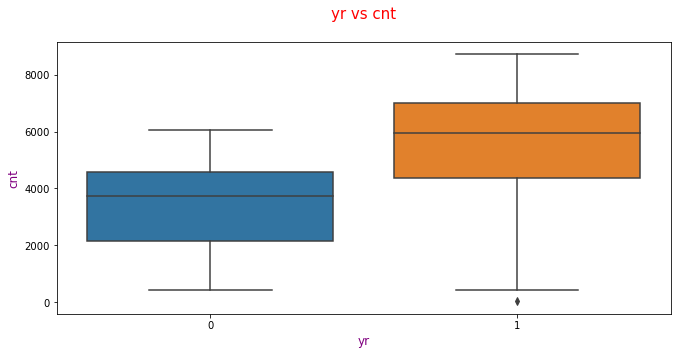

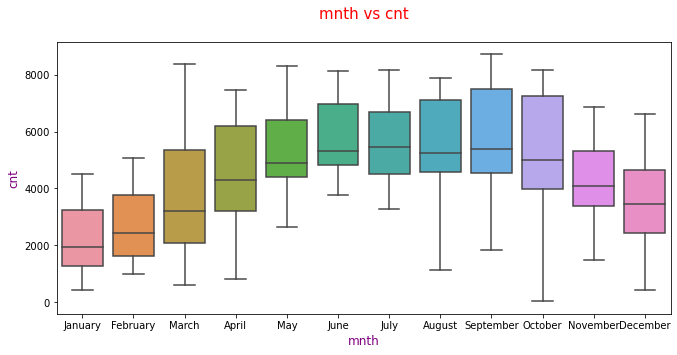

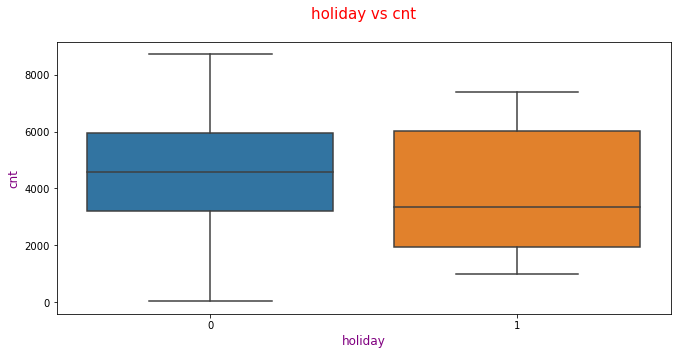

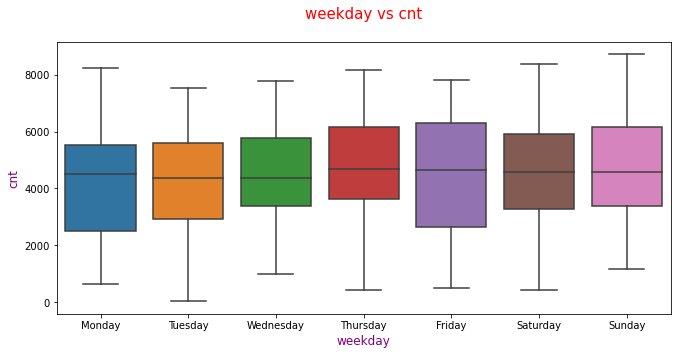

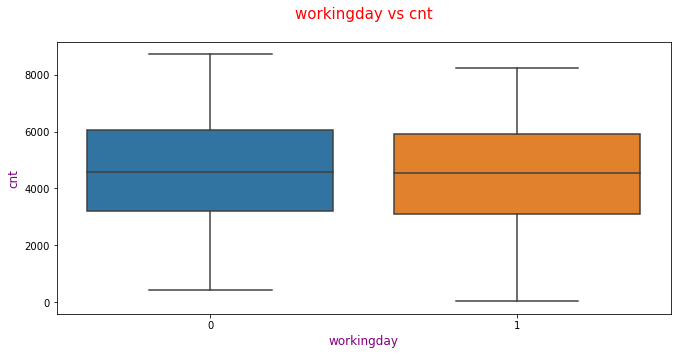

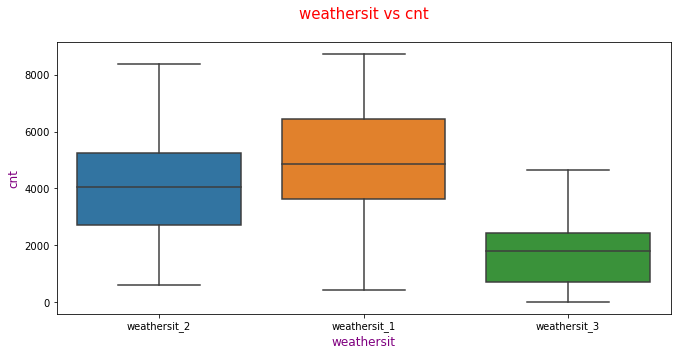

In [122]:
# Plotting boxplot of user count vs categorical columns

for col in categorical_cols:
    plt.figure(figsize=[11,5])
    sns.boxplot(data = Day, x = col, y = "cnt")
    plt.title(col+" vs cnt\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
    plt.xlabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
    plt.ylabel("cnt", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
    plt.show()

Inferences :
    
* For different seasons number of users is highest in fall followed by summer and winter. Number of users is lowest in spring.
* Demand for bikes in year 2019 is more than year 2018.
* September month has highest demand of bikes whereas January has the lowest demand.
* For different days of week demand for bike is high on Sunday, Saturday and Thursday.
* Demand for bikes is high in weathersit_1 i.e. Clear or Partly cloudy weather followed by weathersit_2 i.e. Mist + Cloudy, Mist + Broken clouds, Mist whereas it is very low in weathersit_3 i.e Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain.
* During holiday the demand for bikes is low.

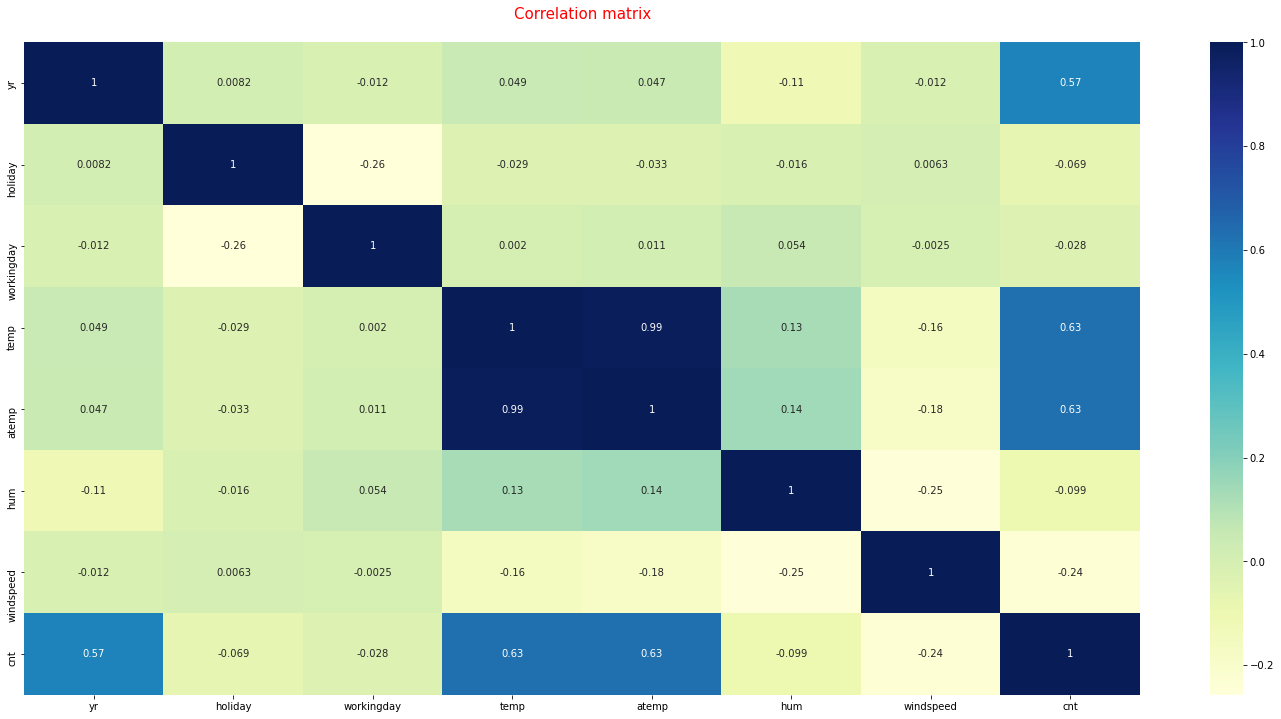

In [123]:
# Plotting a heatmap for ispecting correlation between the numeric variables

plt.figure(figsize=[25,12])
sns.heatmap(Day.corr(), cmap="YlGnBu", annot = True)
plt.title("Correlation matrix\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.show()

Inferences :

* From above heatmap we can see that target variable `cnt` is more correlated with column `yr`, `temp` and `atemp`.
* Also among the independent variables `temp` and `atemp` are highly correlated.

### Data preparation

In [124]:
Day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


#### Variable encoding

In [125]:
# Inspecting the categorical columns as per the data dictionary

for col in categorical_cols:
    print(col)
    print(Day[col].value_counts())
    print()

season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

yr
1    365
0    365
Name: yr, dtype: int64

mnth
January      62
March        62
August       62
December     62
July         62
May          62
October      62
June         60
September    60
April        60
November     60
February     56
Name: mnth, dtype: int64

holiday
0    709
1     21
Name: holiday, dtype: int64

weekday
Tuesday      105
Monday       105
Wednesday    104
Thursday     104
Saturday     104
Friday       104
Sunday       104
Name: weekday, dtype: int64

workingday
1    504
0    226
Name: workingday, dtype: int64

weathersit
weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: weathersit, dtype: int64



**We can see that categorical columns `yr`, `holiday` and `workingday` are binary i.e the values are 0 and 1. So we will be using these columns as it is.**

**Whereas the categorical columns `season`,`mnth`,`weekday` and `weathersit` need to be encoded to dummy variables before the model creation**

In [126]:
# Creating dummy variables for categorical columns with more than two levels
# For k levels we will be creating k-1 dummy variables

season_dummy = pd.get_dummies(Day.season, drop_first= True)
mnth_dummy = pd.get_dummies(Day.mnth, drop_first= True)
weekday_dummy = pd.get_dummies(Day.weekday, drop_first= True)
weathersit_dummy = pd.get_dummies(Day.weathersit, drop_first= True)

In [127]:
# Concatenate the dummy datasets with the Day dataset

Day_new = pd.concat([Day, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy], axis = 1)
Day_new.head()    

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weathersit_2,weathersit_3
0,spring,0,January,0,Monday,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,January,0,Tuesday,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,January,0,Wednesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Now we will drop the categorical columns whose dummy variable are created.**

In [128]:
# Drop the categorical columns

Day_new.drop(columns= ["season", "mnth", "weekday", "weathersit"], axis = 1, inplace = True)

In [129]:
Day_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Splitting the train and test data

In [130]:
# Split the train and test data into 70:30 ratio randomly

df_train, df_test = train_test_split(Day_new , train_size=0.7, test_size=0.3, random_state=100)

In [131]:
# Inspect the shape of train and test data

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


**Rescaling the continous varibales**

**It is extremely important to rescale the variables so that they have a comparable scale. So we will be doing that with the continous variables `temp`, `atemp`, `hum` and `windspeed`.**

**And as most of tha columns are in 0 to 1 range we will be performing MinMax scalling on these columns. One more advantage of MinMax scalling is that the outliers will not affect our model creating.**

*Note : We will not rescale the **target variable** as it looses interpretability when scaled.*

In [132]:
# Create a list of continous numerical columns

cont_num_cols = ["temp", "atemp", "hum", "windspeed"]

In [133]:
# Instantiate an object

scaler = MinMaxScaler()

# Fit on data

df_train[cont_num_cols] = scaler.fit_transform(df_train[cont_num_cols])

In [134]:
# Describe the re-scaled columns of traiun dataset

df_train[cont_num_cols].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768
std,0.225844,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.540519,0.526811,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


In [135]:
# Inspect the first five rows of train dataset

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


*As we can see above all the independent variables are in comparable range and we can now proceed with Model creation*

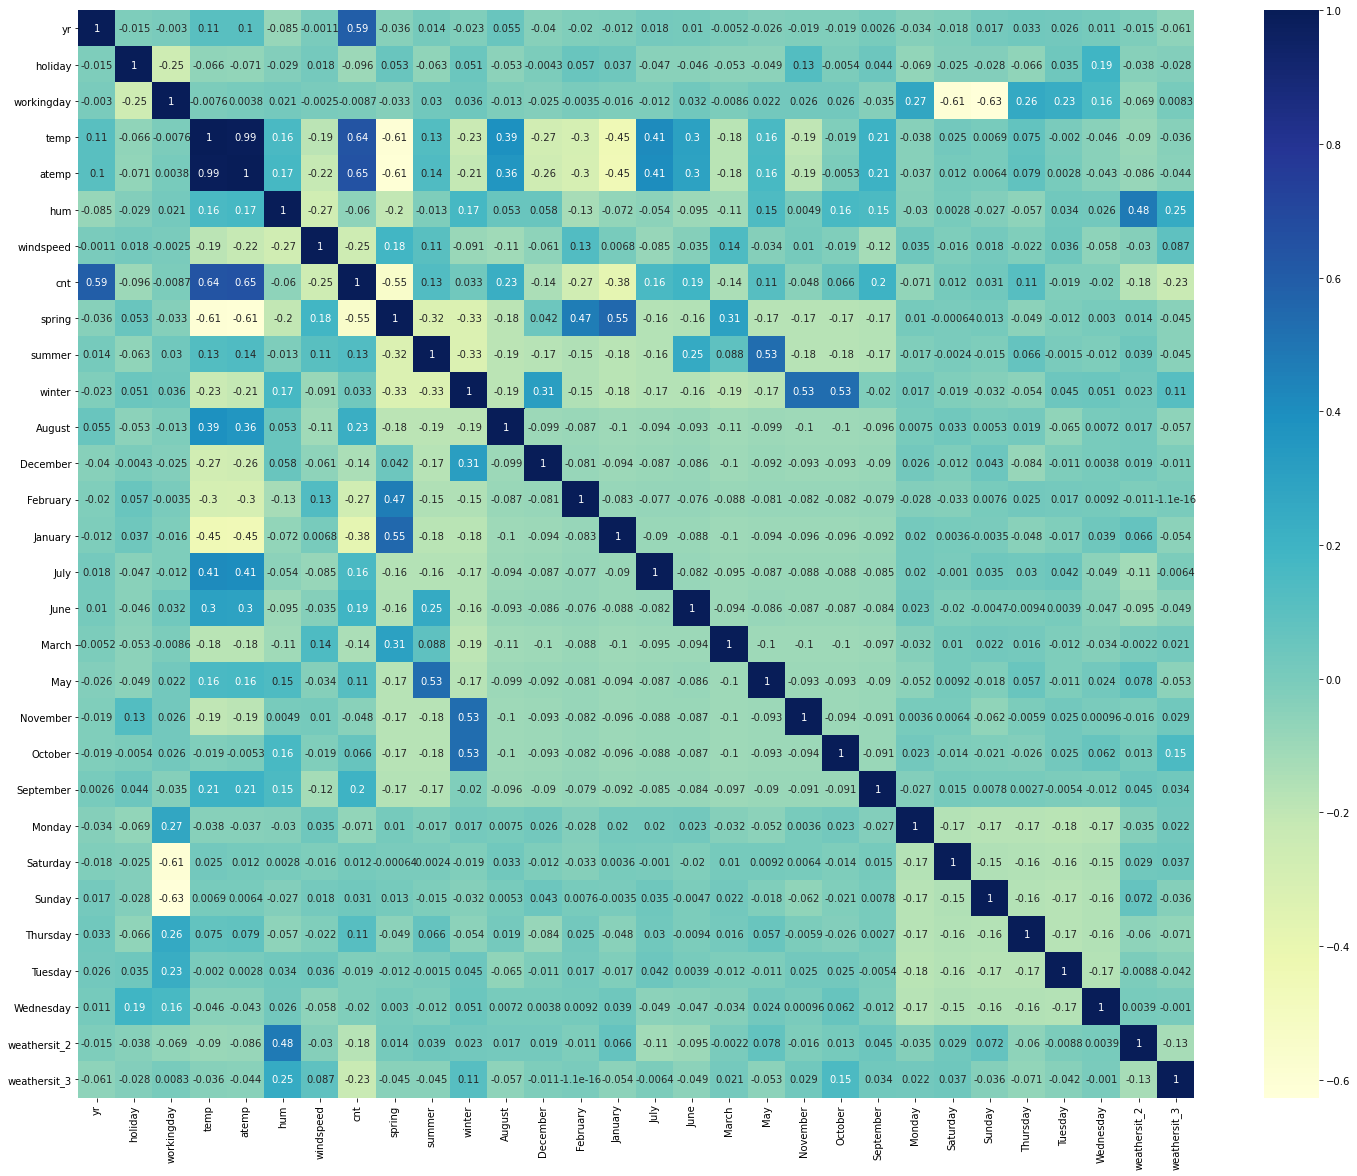

In [136]:
# Plotting the correlation on train data 

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inference :

From above heatmap we can see that the independent variables have multi-collinearity between them. 
* Some months like December, October and November are highly correlated with season winter. 
* Humidity has high correlation with weathersit_2.
* January is highly correlated with spring. 

### Model Building

#### Divide the X and Y sets for Model building

In [137]:
y_train = df_train.pop("cnt")
X_train = df_train

#### We will be using the LinearRegression function from SciKit Learn

#### First we will start with training the model using `RFE` which is utility of sklearn (Recursive feature elimination)

In [138]:
# Checking the total number of features present

len(X_train.columns)

29

In [139]:
# Create an object

lm = LinearRegression()

In [140]:
# Fitting the model

lm.fit(X_train, y_train)

LinearRegression()

*As the total count of columns is 29 we will be giving the limit as 50% of total columns i.e 15 columns.*

In [141]:
# Running RFE with output variables equal to 15

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [142]:
# Display the list of Top 15 variables

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [143]:
# Display and store the selected columns

cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [144]:
# Display the rejected columns

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

#### Now we will be building a model using statsmodels for detailed statistics based on the Top 15 columns selected from RFE

In [145]:
# Create X_train dataframe with RFE selected columns

X_train_rfe = X_train[cols]

In [146]:
# Add a constant c to the equation i.e y= mx + c 

X_train_rfe = sm.add_constant(X_train_rfe)

In [147]:
# Running a linear model using OLS method

lm_1 = sm.OLS(y_train, X_train_rfe).fit()

Now we will take a look at the model summary and take the decisions based on below points.

* If the p-value is very low then we can say the coefficients are significant and the relationship between variables is also significant.
* If R squared is high then the model is a good fit.
* If P(F-statistics) is very low then it means that the model fit is not just by any chance.


In [148]:
# Display the summary of the model

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.34e-189
Time:                        17:58:54   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2805.5562    313.247      8.956   

We also need to check Multicollinearity, which is a phenomenon of having related(independent) predictor variables in dataset. For that we need to check the value of VIF (Variance Infaltion Factor) for each independent column. **VIF** calculates how one independent variable may depend on combination of other independent variables. If VIF is greater than 5 then we will be eliminating those predictor variables.

**From the above summary we can see that the R squared is 0.845 and as the p-value of all the columns are less than 0.05 we will further check the VIF for better decision making.**

In [149]:
# Drop the constant for calculating the VIF

X = X_train_rfe.drop(columns="const", axis = 1)

In [150]:
# Calculate the VIF for verifying the multi- collinearity of independent variables

vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
13,weathersit_2,2.32
0,yr,2.09
11,November,1.83
9,January,1.75


**We can see that the VIF value of column `hum` is 30.94 which is too high. So we will be dropping this column**

In [151]:
# Dropping the column hum from X_train

X_train_new1 = X_train_rfe.drop(columns="hum", axis = 1)

*Re-build model without column `hum`*

In [152]:
# Add a constant to the X_train set

X_train_new1 = sm.add_constant(X_train_new1)

# Running a linear model using OLS method

lm_2 = sm.OLS(y_train, X_train_new1).fit()

In [153]:
# Display the summary of new model

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.57e-186
Time:                        17:58:54   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2165.7529    279.173      7.758   

In [154]:
# Drop the constant before calculating the VIF

X = X_train_new1.drop(columns="const", axis = 1)

In [155]:
# Calculate the VIF for verifying the multi- collinearity of independent variables

vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,November,1.80
8,January,1.66
9,July,1.59
12,weathersit_2,1.56


**From the above summary we can see that p-value of all the columns is less than 0.05. Going further column `temp` has VIF more than 5 but considering business importance of this column we will be keeping it.**

**Also if we look at the p-values the highest value is for column `summer` which is 0.03. So we will be dropping this column.** 

In [156]:
# Dropping the column summer from X_train

X_train_new2 = X_train_new1.drop(columns="summer", axis = 1)

*Re-build model without column `summer`*

In [157]:
# Add a constant to the X_train set

X_train_new2 = sm.add_constant(X_train_new2)

# Running a linear model using OLS method

lm_3 = sm.OLS(y_train, X_train_new2).fit()

In [158]:
# Display the summary of new model

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.08e-186
Time:                        17:58:54   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2536.8296    220.087     11.527   

In [159]:
# Drop the constant before calculating the VIF

X = X_train_new2.drop(columns="const", axis = 1)

In [160]:
# Calculate the VIF for verifying the multi-collinearity of independent variables

vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,November,1.80
7,January,1.65
11,weathersit_2,1.53
6,December,1.46
8,July,1.36


**Now we can see that column `temp` VIF has reduced to 4.67.**

**Also if we look at the p-values the highest value is for column `November` which is 0.01. So we will be dropping this column.** 

In [161]:
# Drop the column November

X_train_new3 = X_train_new2.drop(columns="November", axis = 1)

In [162]:
# Add a constant to the X_train set

X_train_new3 = sm.add_constant(X_train_new3)

# Running a linear model using OLS method

lm_4 = sm.OLS(y_train, X_train_new3).fit()

In [163]:
# Display the summary of new model

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.02e-186
Time:                        17:58:54   Log-Likelihood:                -4126.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     497   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2428.8926    217.355     11.175   

In [164]:
# Drop the constant before calculating the VIF

X = X_train_new3.drop(columns="const", axis = 1)

In [165]:
# Calculate the VIF for verifying the multi-collinearity of independent variables

vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,January,1.64
10,weathersit_2,1.53
8,July,1.36
6,December,1.29
9,September,1.20


**If we look at the p-values the highest value is for column `December` which is 0.037. So we will be dropping this column.** 

In [166]:
# Drop the column December

X_train_new4 = X_train_new3.drop(columns="December", axis = 1)

In [167]:
# Add a constant to the X_train set

X_train_new4 = sm.add_constant(X_train_new4)

# Running a linear model using OLS method

lm_5 = sm.OLS(y_train, X_train_new4).fit()

In [168]:
# Display the summary of new model

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.13e-186
Time:                        17:58:55   Log-Likelihood:                -4128.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     498   BIC:                             8331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2331.5423    213.001     10.946   

In [169]:
# Drop the constant before calculating the VIF

X = X_train_new4.drop(columns="const", axis = 1)

In [170]:
# Calculate the VIF for verifying the multi- collinearity of independent variables

vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,January,1.60
9,weathersit_2,1.53
5,winter,1.40
7,July,1.36
8,September,1.20
10,weathersit_3,1.08


**If we look at the p-values the highest value is for column `January` which is 0.018. So we will be dropping this column.** 

In [171]:
# Drop the column January

X_train_new5 = X_train_new4.drop(columns="January", axis = 1)

In [172]:
# Add a constant to the X_train set

X_train_new5 = sm.add_constant(X_train_new5)

# Running a linear model using OLS method

lm_6 = sm.OLS(y_train, X_train_new5).fit()

In [173]:
# Display the summary for new model

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.16e-186
Time:                        17:58:55   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2211.5088    207.921     10.636   

In [174]:
# Drop the constant before calculating the VIF

X = X_train_new5.drop(columns="const", axis = 1)

In [175]:
# Calculate the VIF for verifying the multi- collinearity of independent variables

vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
8,weathersit_2,1.51
5,winter,1.40
6,July,1.35
7,September,1.20
9,weathersit_3,1.08
1,holiday,1.04


**Now we can see the following :**
* The p-value for all the columns is 0
* The VIF for all the columns is less than 5
* The R squared value is 0.833 i.e 83%
* The adjusted R squared vakue is 0.830 i.e 83%
* The P(F-statistics) is very low i.e 1.16e-186

Looking at all the above factors we can say model explains the variation in the Target variable by 83%. Also the VIF and p-value are in acceptable range. So we will be finalizing the model lm_6 and we will be doing the predictions on the same model.

### Residual Analysis

We have finalized the model lm_6 and our X train data is X_train_new5 and y train data is y_train

In [176]:
# Display the top 10 selected features using RFE and manual feature selection method

X_train_new5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'July', 'September', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [177]:
# Calculate the y predicted

y_pred = lm_6.predict(X_train_new5)

In [178]:
# Calculate the residual 

res = y_train - y_pred

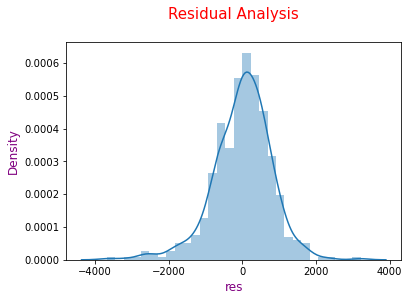

In [179]:
# Plotting a distplot to check few assumptions

sns.distplot(res)
plt.title("Residual Analysis\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.xlabel("res", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.ylabel("Density", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.show()

**Assumptions are as below**

* We can see that the mean of error terms is 0
* Error terms are normally distributed 
* Error terms have constant variance

### Model Prediction and Evaluation

***As we scaled the train data while building the model we will also be scalling the test dataset for prediction using Min Max method***

**For train data we use `fit_transform()` as fit() will make the model learn the xmin xmax and then transform() will do the scalling**

**But for the test data we will not be using fit() as we don't need to make the model anything regarding the test data. Model is just supposed to do the predictions fot test data. So we will be using jsut `transform()`.**

In [180]:
# Create a list of continous numerical columns

cont_num_cols = ["temp", "atemp", "hum", "windspeed"]

In [181]:
# Fit on Data

df_test[cont_num_cols] = scaler.transform(df_test[cont_num_cols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [182]:
# Describe the test set

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
# Divide the X and y test set

y_test = df_test.pop("cnt")
X_test = df_test

In [184]:
# Add a constant to X_test

X_test = sm.add_constant(X_test)

In [185]:
# Drop the insignificant variables

X_test = X_test[X_train_new5.columns]

In [186]:
# Predict the y_test

y_test_pred = lm_6.predict(X_test)

In [187]:
# Calculate the R-squared score on the test set

r2_score(y_test, y_test_pred)

0.8070101019557961

*Adjusted R squared* = 1 – [(1-R2)*(n-1)/(n-k-1)]

n - numnber of observation

k - number of predictor variables

In [188]:
# Calculate the Adjusted R squared on the test set

1 - (1-0.8070101019557961)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7967546001273602

**As we saw earlier the R squared of train data was 0.83 and the calculated R square of test data is 0.80 which tells us our model is making right predictions**

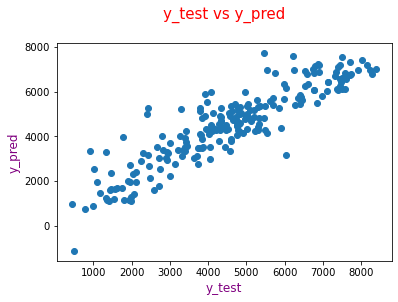

In [189]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_test_pred)
plt.title("y_test vs y_pred\n", fontdict={"fontsize":15, "fontweight":5, "color":"Red"})
plt.xlabel("y_test", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.ylabel("y_pred", fontdict={"fontsize":12, "fontweight":5, "color":"purple"})
plt.show()

**Looking at the relationship of y_test and y_pred we can say that our overall model is a good fit.**

In [190]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.16e-186
Time:                        17:58:56   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2211.5088    207.921     10.636   

### Train and Test set comparison

* Train set
    - R squared : 0.833
    - Adj R squared : 0.830

* Test set
    - R squared : 0.807
    - Adj R squared : 0.796

* Train and Test difference between
    - R squared : 0.026
    - Adj R squared : 0.034

As we can see the difference between the train and test set values for both R sqaured and Adjusted R squared is less than 5% we can say that our model is best.

***We can see that the equation of our best fit line is :*** 

**As seen in above summary the coefficients have large value as we had not rescaled the Target variable for better interpretability so the coefficients have adjusted itself based on the scale of Target variable.**

*Equation*

cnt = 2211.50 + 2034.72(yr) - 856.64(holiday) + 3924.05(temp) - 1215.28(windspeed) - 963.02(spring) + 410.93(winter) - 632.07(July) + 501.57(September) - 705.20(weathersit_2) - 2489.46(weathersit_3)

***Insights from the Model***

We can say that the Target variable `cnt` has following correlations: 

* Highest positive correlation is for `temp` column. So we can say that if temperature increases by one unit then the demand for bikes increases by 3924.05 considering other independent variables as constant.

* Highest Negative correlation is for `weathersit_3` column. So we can say that in weather like Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds the demand for bike is decreases.

* The second highest positive correlation is for `yr` column. So we can assume the demand for bike is increasing over time as demand for 2019 is higher than 2018.

* Column `windspeed` is negatively correlated. So we can say that demand for bikes decreases as the windspeed increases.

* We have negative correlation between column `holiday` and `cnt`. So when it is holiday the demand for bikes is low.

* Looking at the seasons column `spring` is negatively correlated. So we can say demand for bike decreases in spring.

* Column `September` is positively correlated. So the demad for bikes more in September.

## Thank You